In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# import pdb
# import skvideo
# import skvideo.io

from moviepy.editor import *
from moviepy.video.io.bindings import mplfig_to_npimage

In [18]:
video = "/home/ibm-work/data/toy-video.mp4"

# Load in video


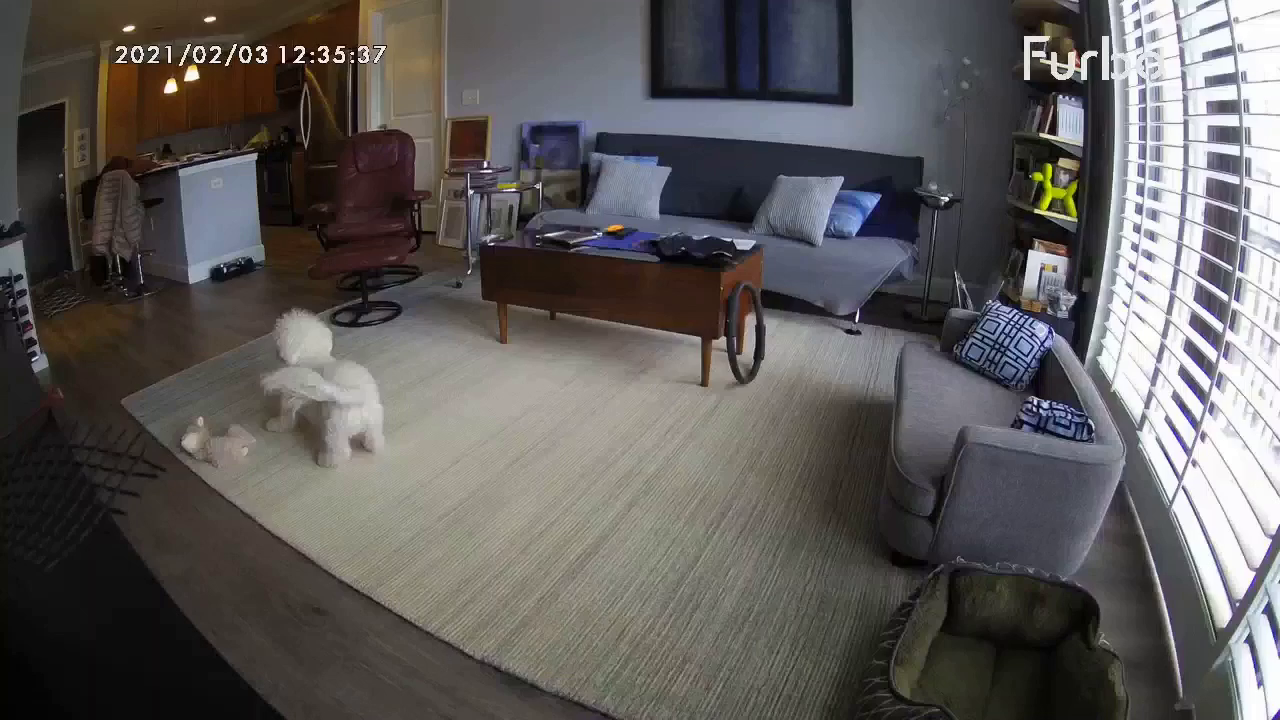

In [19]:
vid = VideoFileClip(video, audio=False)
vid.ipython_display(t=0) # will display a snapshot at t=0s

# frame extraction to Numpy

In [20]:
frame = vid.to_ImageClip(t=62).img

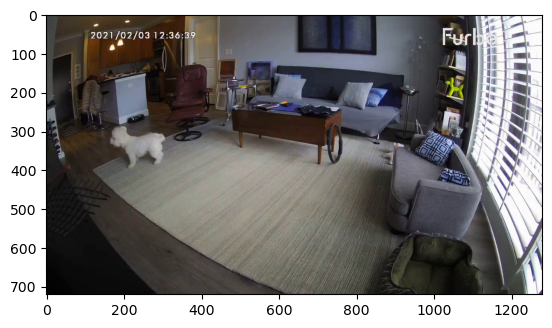

In [21]:
plt.imshow(frame)

# Downsample video as a 62-frame gif

In [22]:
gif = vid.set_fps(1)

In [23]:
for i,f in enumerate(gif.iter_frames()):
    pass
print(i)


62


In [9]:
# gif.ipython_display(fps=1, loop=True, autoplay=True, maxduration=63)

# Apply clip and clipseg to this gif

In [24]:
import os
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image


In [25]:
# Intialize CLIP model
clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [26]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
clipseg_processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
clipseg = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

helper functions

In [27]:
from clip_sam_helper import clip_inference, clip_inference_chunks
from clip_sam_helper import clipseg_inference, extract_entities


In [28]:
vocab = ["pole", "dog", "window", "person", "telephone booth", "road", "sign", "cat", "car", "lamp", "tree"]

try one frame

In [29]:
frame = gif.to_ImageClip(t=0).img
frame = Image.fromarray(np.uint8(frame))

probs_whole = clip_inference(clip, clip_processor, frame, vocab)
probs_chunk = clip_inference_chunks(clip, clip_processor, frame, vocab)
entities_dict = extract_entities(probs_whole, probs_chunk, vocab)
mask, vmax = clipseg_inference(clipseg, clipseg_processor, frame, entities_dict, viz_flag=False) 

(-0.5, 1279.5, 719.5, -0.5)

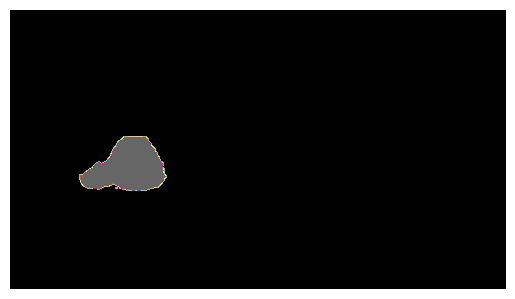

In [30]:
fig, ax = plt.subplots()
my_cmap = plt.get_cmap('Accent')
my_cmap.set_under('black')
ax.imshow(mask, cmap=my_cmap, vmin=0.001, vmax=vmax)
ax.axis('off')

now try full gif

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


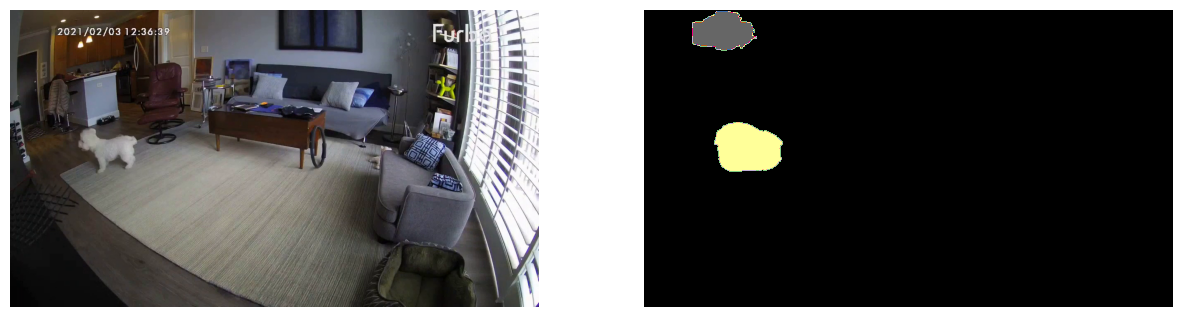

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
my_cmap = plt.get_cmap('Accent')
my_cmap.set_under('black')
duration = 63

def make_frame(t):
    ax[0].clear()
    frame = gif.to_ImageClip(t=t).img
    ax[0].imshow(frame)
    ax[0].axis('off')

    ax[1].clear()
    frame = Image.fromarray(np.uint8(frame))
    probs_whole = clip_inference(clip, clip_processor, frame, vocab)
    probs_chunk = clip_inference_chunks(clip, clip_processor, frame, vocab)
    entities_dict = extract_entities(probs_whole, probs_chunk, vocab)
    mask, vmax = clipseg_inference(clipseg, clipseg_processor, frame, entities_dict, viz_flag=False) 
    ax[1].imshow(mask, cmap=my_cmap, vmin=0.001, vmax=vmax)
    ax[1].axis('off')

    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
animation.ipython_display(fps=1, loop=True, autoplay=True, maxduration=duration)

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(15, 15))
# my_cmap = plt.get_cmap('Accent')
# my_cmap.set_under('black')
# duration = 63

# def make_frame(t):
#     ax[0].clear()
#     frame = gif.to_ImageClip(t=t).img
#     ax[0].imshow(frame)
#     ax[0].axis('off')

#     ax[1].clear()
#     frame = Image.fromarray(np.uint8(frame))
#     probs_whole = clip_inference(clip, clip_processor, frame, vocab)
#     probs_chunk = clip_inference_chunks(clip, clip_processor, frame, vocab)
#     entities_dict = extract_entities(probs_whole, probs_chunk, vocab)
#     mask, vmax = clipseg_inference(clipseg, clipseg_processor, frame, entities_dict, viz_flag=False) 
#     ax[1].imshow(mask, cmap=my_cmap, vmin=0.001, vmax=vmax)
#     ax[1].axis('off')

#     return mplfig_to_npimage(fig)

# animation = VideoClip(make_frame, duration=duration)
# animation.ipython_display(fps=1, loop=True, autoplay=True, maxduration=duration)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


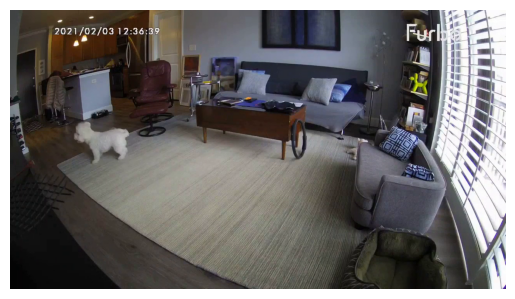

In [59]:
duration = 63
fig, ax = plt.subplots()

def make_frame(t):
    ax.clear()
    ax.imshow(vid.to_ImageClip(t=t).img)
    ax.axis('off')
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
animation.ipython_display(fps=1, loop=True, autoplay=True, maxduration=duration)